/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


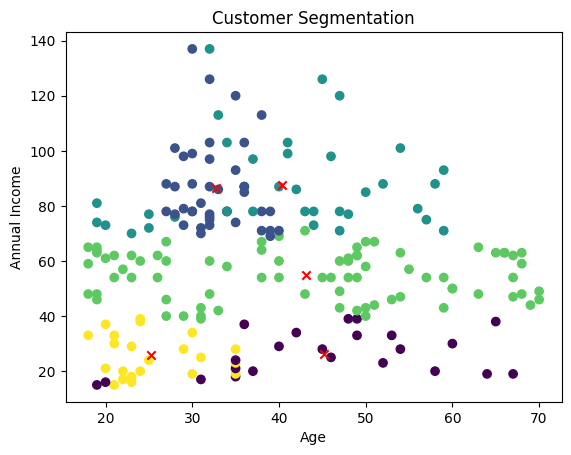

Cluster 0:
       CustomerID      Genre        Age  Annual Income (k$)  \
count    23.00000  23.000000  23.000000           23.000000   
mean     23.00000   0.391304  45.217391           26.304348   
std      13.56466   0.499011  13.228607            7.893811   
min       1.00000   0.000000  19.000000           15.000000   
25%      12.00000   0.000000  35.500000           19.500000   
50%      23.00000   0.000000  46.000000           25.000000   
75%      34.00000   1.000000  53.500000           33.000000   
max      45.00000   1.000000  67.000000           39.000000   

       Spending Score (1-100)  Cluster  
count               23.000000     23.0  
mean                20.913043      0.0  
std                 13.017167      0.0  
min                  3.000000      0.0  
25%                  9.500000      0.0  
50%                 17.000000      0.0  
75%                 33.500000      0.0  
max                 40.000000      0.0  
Cluster 1:
       CustomerID      Genre        Age  

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/Mall_Customers.csv")

# Extract relevant columns
columns = ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df = data[columns]

# Data preprocessing (if required)
# For example, converting Genre column to numerical values (0 for Female, 1 for Male)
df['Genre'] = df['Genre'].map({'Female': 0, 'Male': 1})

# Perform feature scaling (if required)
# For example, scaling Age, Annual Income, and Spending Score to a similar range
# You can use MinMaxScaler or StandardScaler from sklearn.preprocessing

# Perform customer segmentation using K-means clustering
k = 5  # Number of clusters
X = df.iloc[:, 2:].values  # Extracting Age, Annual Income, and Spending Score as features
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Analyze the results
cluster_centers = kmeans.cluster_centers_  # Centroids of the clusters
cluster_labels = np.unique(kmeans.labels_)  # Unique cluster labels

# Visualize the clusters (Example with two features: Age and Annual Income)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Customer Segmentation')
plt.show()

# You can further analyze each cluster to gain insights about customer segments
for label in cluster_labels:
    cluster_data = df[df['Cluster'] == label]
    print(f"Cluster {label}:")
    print(cluster_data.describe())
